In [2]:
%matplotlib inline
import random 
import torch
from d2l import torch as d2l

In [28]:
def create(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w)))  #构建均值为0，方差为1形状为（，）的张量
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)  # 噪音
    
    return x,y.reshape(-1,1)  # reshape(-1,1)变为列向量

true_w = torch.tensor([2,-3.4])
true_b = 4.2
feature,label = d2l.synthetic_data(true_w,true_b,1000)

In [4]:
print("features: ",feature[0],"\nlabel: ",label[0])

features:  tensor([ 0.1753, -0.0317]) 
label:  tensor([4.6681])


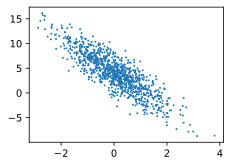

In [7]:
d2l.set_figsize()
d2l.plt.scatter(feature[:, (1)].detach().numpy(), label.detach().numpy(), 1);

In [17]:
def data_iter(batch_size, feature,label):
    num_examples = len(feature)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min( 1+ batch_size, num_examples)])
        yield feature[batch_indices], label[batch_indices]
    
batch_size = 10
for x,y in data_iter(batch_size,feature,label):
    print(x,'\n',y)
    break;

tensor([[ 1.4383, -0.5080],
        [-0.5598,  0.2604],
        [ 0.1416, -0.2523],
        [-1.6733,  1.9907],
        [-2.0904, -1.1273],
        [-1.2555, -0.3357],
        [-0.1354,  0.0993],
        [-0.1471,  0.4100],
        [-1.1638,  1.5081],
        [-2.3187,  1.1462],
        [ 0.3184,  0.0837]]) 
 tensor([[ 8.7977],
        [ 2.2014],
        [ 5.3399],
        [-5.9146],
        [ 3.8477],
        [ 2.8247],
        [ 3.5976],
        [ 2.5048],
        [-3.2425],
        [-4.3297],
        [ 4.5567]])


In [18]:
# 初始化 w和b
w = torch.normal(0,1,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [23]:
def linreg(x,w,b):
    """ 回归函数形式"""
    return torch.matmul(x,w) + b

In [24]:
def loss(y_hat, y):
    """损失函数 """
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [22]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [25]:
lr = 0.03
num_epochs = 3
net = linreg

In [29]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, feature, label):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(feature, w, b), label)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

IndexError: tensors used as indices must be long, byte or bool tensors